*Author: Pooya Bagheri*               <b>Under Construction</b>

**Important Note:** Please ensure not to confuse **Loss** (common term used in machine learning) with **Power Loss** which is a power engineering term and the output we are trying to model and predict in this project

Our objective since the [previous step](Step2-MLmodels-Linear.ipynb) has been to create an ML model to predict feeder's total power loss based on the voltages measured at the same instant. The first try with applying raw linear regression was a failure, however later, by engaging feature engineering and especially PCA to define new features we reduced the prediction error down to 4.1%. 

As already discussed in the [first step](Step1-DataExploration.ipynb), we know from power circuit theory that relationship of total power loss to node voltages is complicated and nonlinear. That is why a linear regression without any feature engineering was not working. Nonetheless, in this step, we try to engage neural networks which are very capable to represent nonlinear relationships of the data. 

We start the procedure by loading the same amount of data as to the previous step. 

In [1]:
from LoadingDataClass import MLinputData
train=MLinputData(1,5) # Loading Training sets (first 5 days)
test=MLinputData(26,30) # Loading Test sets (last 5 of 30 days)
#Double-checking size of the loaded data sets
print(train.x.shape, train.y.shape, test.x.shape, test.y.shape) 

(7200, 278) (7200, 1) (7200, 278) (7200, 1)


The size of data sets are reasonable and well-expected (see [step 2](Step2-MLmodels-Linear.ipynb)).

Nonlinear ML models including Neural Networks are very sensitive to scaling of the data. We use the standard scaler tool from SKlearn library to scale our data before training the model:

In [2]:
from sklearn.preprocessing import StandardScaler

#Scaling the predictive data sets:
scaler_x=StandardScaler()
x_train=scaler_x.fit_transform(train.x)
x_test=scaler_x.transform(test.x)
#Scaling the output data sets:
scaler_y=StandardScaler()
y_train=scaler_y.fit_transform(train.y)

For example, we can see how our output data (i.e. power loss) in training set  is scaled:

In [3]:
from MyPlotTools import Plot
Plt=Plot(FromDay=1,ToDay=5,plotHeight=5,plotWidth=10)
Plt.Multiple([train.y,y_train],['Before Scaling','After Scaling'],['Power Losss (kW)','Scaled Power Loss'])

<Figure size 1000x500 with 2 Axes>

For training and testing a neural network, we use the tools from Keras library:

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error 

Using TensorFlow backend.


In [5]:
models=[]
models.append(Sequential())
DataWidth=x_train.shape[1]
models[0].add(Dense(int(DataWidth), input_dim=DataWidth,kernel_initializer='uniform',activation='relu'))
models[0].add(Dense(1,kernel_initializer='uniform',activation='linear'))

In [7]:
models[0].compile(optimizer='Adam' ,loss='mse',metrics=['mse'])
LearningHistory=models[0].fit(x_train,y_train,validation_split=0.1, batch_size=1,epochs=2, shuffle=True)
y_predicted=models[0].predict(x_test)

Train on 6480 samples, validate on 720 samples
Epoch 1/2
6480/6480 [==============================] - 8s 1ms/step - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 2/2
6480/6480 [==============================] - 7s 1ms/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0230 - val_mean_squared_error: 0.0230


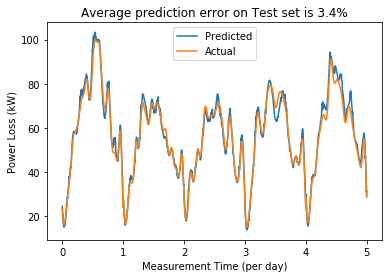

In [15]:
Plt.AssessPrediction(scaler_y.inverse_transform(y_predicted),test.y)

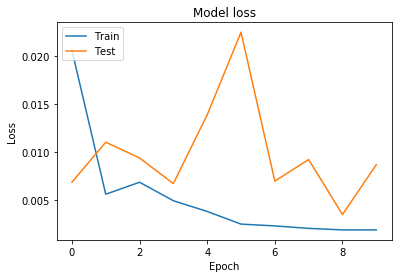

In [14]:
Plt.LearningCurve(LearningHistory2)

In [13]:
LearningHistory2=models[0].fit(x_train,y_train,validation_split=0.1, batch_size=1,epochs=10, shuffle=True)

Train on 6480 samples, validate on 720 samples
Epoch 1/10
6480/6480 [==============================] - 8s 1ms/step - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 2/10
6480/6480 [==============================] - 7s 1ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 3/10
6480/6480 [==============================] - 7s 1ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/10
6480/6480 [==============================] - 7s 1ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 5/10
6480/6480 [==============================] - 7s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 6/10
6480/6480 [==============================] - 7s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0225 - 

In [16]:
models.append(Sequential())
DataWidth=x_train.shape[1]
models[1].add(Dense(int(DataWidth), input_dim=DataWidth,kernel_initializer='uniform',activation='relu'))
models[1].add(Dense(int(DataWidth/2), input_dim=DataWidth,kernel_initializer='uniform',activation='relu'))
models[1].add(Dense(1,kernel_initializer='uniform',activation='linear'))

In [18]:
models[1].compile(optimizer='Adam' ,loss='mse',metrics=['mse'])
LearningHistory3=models[1].fit(x_train,y_train,validation_split=0.1, batch_size=1,epochs=10, shuffle=True)
y_predicted=models[1].predict(x_test)

Train on 6480 samples, validate on 720 samples
Epoch 1/10
6480/6480 [==============================] - 11s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 2/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 3/10
6480/6480 [==============================] - 10s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 6/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0

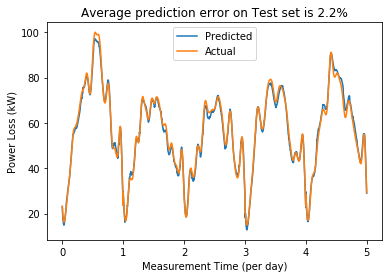

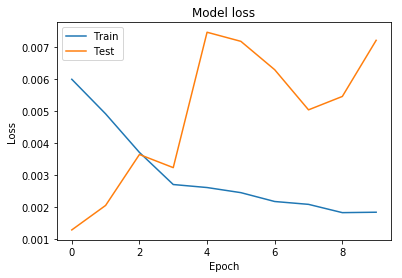

In [19]:
Plt.AssessPrediction(scaler_y.inverse_transform(y_predicted),test.y)
Plt.LearningCurve(LearningHistory3)

In [20]:
models[1].compile(optimizer='Adam' ,loss='mse',metrics=['mse'])
LearningHistory3=models[1].fit(x_train,y_train,validation_split=0.1, batch_size=1,epochs=10, shuffle=True)
y_predicted=models[1].predict(x_test)

Train on 6480 samples, validate on 720 samples
Epoch 1/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 2/10
6480/6480 [==============================] - 10s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 3/10
6480/6480 [==============================] - 10s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 4/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 5/10
6480/6480 [==============================] - 10s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/10
6480/6480 [==============================] - 9s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.00

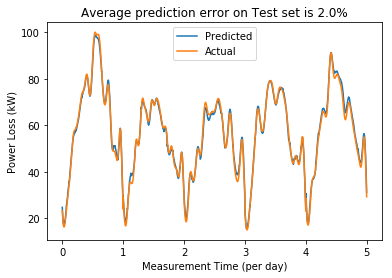

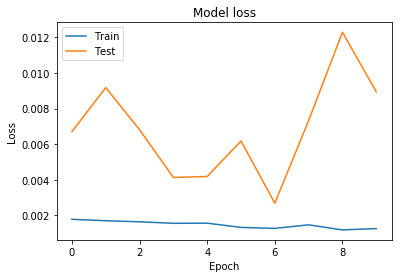

In [21]:
Plt.AssessPrediction(scaler_y.inverse_transform(y_predicted),test.y)
Plt.LearningCurve(LearningHistory3)